In [1]:
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt

In [60]:
df = yf.download(tickers='COM7.BK', start='2017-08-19',end='2022-08-19', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [61]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-21,6.20,6.20,5.95,6.10,5.435341,19169200
2017-08-22,6.10,6.20,6.05,6.20,5.524445,7861200
2017-08-23,6.20,6.25,6.15,6.20,5.524445,9803400
2017-08-24,6.20,6.25,6.05,6.10,5.435341,16304200
2017-08-25,6.15,6.15,6.05,6.10,5.435341,4711000
...,...,...,...,...,...,...
2022-08-11,33.00,34.00,32.50,33.25,33.250000,21708000
2022-08-15,32.00,33.25,31.00,33.00,33.000000,26552700
2022-08-16,33.00,34.00,32.75,34.00,34.000000,15876900


In [62]:
# Define Strategy

In [63]:
df['Volume_MA'] = df['Volume'].rolling(5).mean()

# you can change normal volume to  average volume

In [64]:
vol_std = df['Volume'].std()

In [65]:
vol_mean = df['Volume'].mean()

In [66]:
df['z_score_vol'] = (df['Volume'] - vol_mean)/vol_std

# zscore = profile 

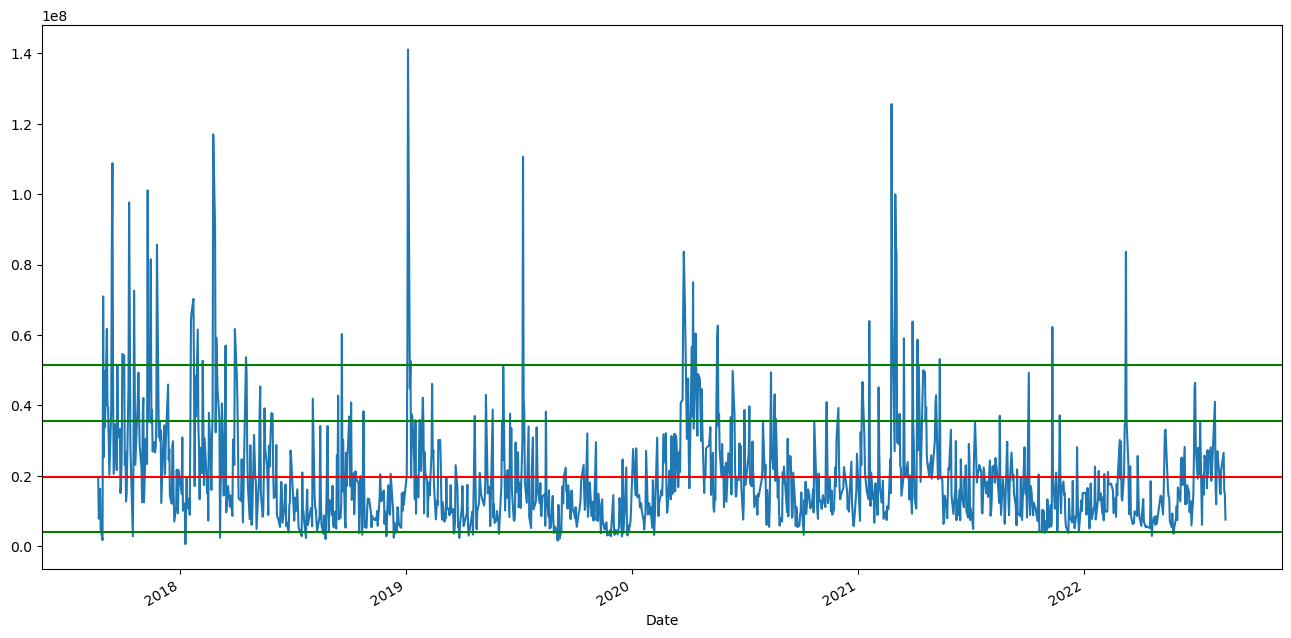

In [67]:
df.Volume.plot(figsize=(16,8))
plt.axhline(vol_mean,color='r')
plt.axhline(vol_mean+1*vol_std,color='g')
plt.axhline(vol_mean-1*vol_std,color='g')
plt.axhline(vol_mean+2*vol_std,color='g')

In [68]:
df.loc[(df['z_score_vol'] < -0.5 ) , 'weight'] = 1
df.loc[(df['z_score_vol'] >= -0.5) & (df['z_score_vol'] < 0.5), 'weight'] = 0.7
df.loc[(df['z_score_vol'] >= 0.5) & (df['z_score_vol'] < 2), 'weight'] = 1
df.loc[(df['z_score_vol'] >= 2), 'weight'] = 2

In [69]:
df

,Open,High,Low,Close,Adj Close,Volume,Volume_MA,z_score_vol,weight
Date,,,,,,,,,
2017-08-21,6.20,6.20,5.95,6.10,5.435341,19169200,NaN,-0.038740,0.7
2017-08-22,6.10,6.20,6.05,6.20,5.524445,7861200,NaN,-0.754126,1.0
2017-08-23,6.20,6.25,6.15,6.20,5.524445,9803400,NaN,-0.631256,1.0
2017-08-24,6.20,6.25,6.05,6.10,5.435341,16304200,NaN,-0.219991,0.7
2017-08-25,6.15,6.15,6.05,6.10,5.435341,4711000,11569800.0,-0.953420,1.0
...,...,...,...,...,...,...,...,...,...
2022-08-11,33.00,34.00,32.50,33.25,33.250000,21708000,19917400.0,0.121874,0.7
2022-08-15,32.00,33.25,31.00,33.00,33.000000,26552700,19828080.0,0.428368,0.7
2022-08-16,33.00,34.00,32.75,34.00,34.000000,15876900,18978000.0,-0.247023,0.7


In [70]:
df.weight.value_counts()

1.0    622
0.7    540
2.0     51
Name: weight, dtype: int64

In [71]:
# Cal MACD
df['macd'] = df.ta.macd()['MACD_12_26_9']
df['macd_signal'] = df.ta.macd()['MACDs_12_26_9']

long_trigger = df['macd'].vbt.crossed_above(df['macd_signal'])
short_trigger= df['macd'].vbt.crossed_below(df['macd_signal'])

In [72]:
df['signal'] = long_trigger

In [73]:
df[df['signal']==True][['weight','macd','z_score_vol']]

,weight,macd,z_score_vol
Date,,,
2017-10-09,1.0,0.086647,1.650477
2017-11-06,1.0,0.244836,0.680214
2017-12-25,1.0,0.010020,-0.557300
2018-01-18,2.0,-0.038981,2.812354
2018-02-20,0.7,0.082837,-0.238084
2018-04-02,1.0,0.161109,1.862664
2018-04-10,0.7,0.155227,0.315322
2018-05-09,1.0,0.089384,1.125540
2018-06-12,0.7,-0.144291,-0.439921


In [74]:

# Add to VBT
long_entries = long_trigger 
#short_entries = short_trigger 
long_exits = short_trigger
#short_exits = long_trigger

In [75]:
# Calculate size with volatility

<AxesSubplot:xlabel='Date'>

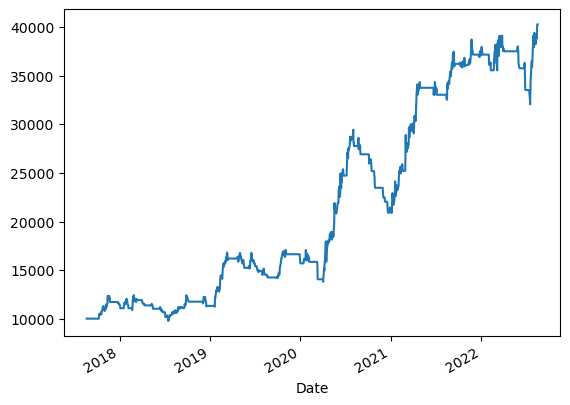

In [76]:
# Run Strategy with out weight
port = vbt.Portfolio.from_signals(df.Close,
                                entries = long_entries,
                                exits = long_exits,
                                freq = 'D',
                                init_cash = 10000
                                )

port.value().plot()

In [77]:
record = port.trades.records_readable
record['amount_entry'] = record['Size']*record['Avg Entry Price']
record

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id,amount_entry
0,0,0,1438.848960,2017-10-09,6.950,0.0,2017-11-03,7.650,0.0,1007.194684,0.100719,Long,Closed,0,10000.000000
1,1,0,1411.178771,2017-11-06,7.800,0.0,2017-11-23,8.300,0.0,705.589386,0.064103,Long,Closed,1,11007.194684
2,2,0,1419.731402,2017-12-25,8.250,0.0,2018-01-04,7.800,0.0,-638.878860,-0.054545,Long,Closed,2,11712.784069
3,3,0,1375.640366,2018-01-18,8.050,0.0,2018-02-06,8.050,0.0,0.000000,0.000000,Long,Closed,3,11073.905209
4,4,0,1287.663339,2018-02-20,8.600,0.0,2018-03-13,9.250,0.0,836.980679,0.075581,Long,Closed,4,11073.905209
5,5,0,1221.629322,2018-04-02,9.750,0.0,2018-04-09,9.450,0.0,-366.489030,-0.030769,Long,Closed,5,11910.885889
6,6,0,1202.541292,2018-04-10,9.600,0.0,2018-04-12,9.450,0.0,-180.381882,-0.015625,Long,Closed,6,11544.396859
7,7,0,1153.707060,2018-05-09,9.850,0.0,2018-05-16,9.550,0.0,-346.112338,-0.030457,Long,Closed,7,11364.014977
8,8,0,1217.447780,2018-06-12,9.050,0.0,2018-06-26,8.750,0.0,-365.234566,-0.033149,Long,Closed,8,11017.902639
9,9,0,1224.444633,2018-07-04,8.700,0.0,2018-07-05,8.300,0.0,-489.777386,-0.045977,Long,Closed,9,10652.668073


<AxesSubplot:xlabel='Date'>

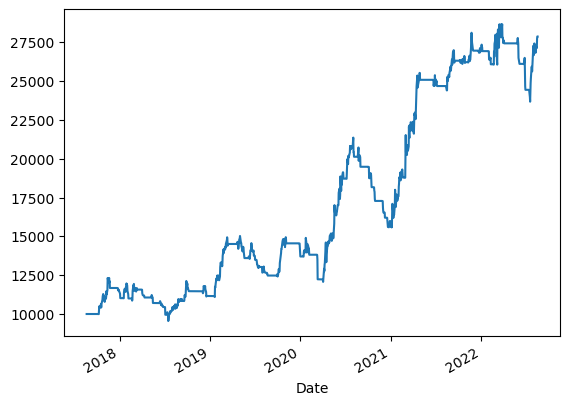

In [78]:
# with weight
port = vbt.Portfolio.from_signals(df.Close,
                                entries = long_entries,
                                exits = long_exits,
                                freq = 'D',
                                init_cash = 10000,
                                size = df['weight'] ,
                                size_type='Percent',
                                fees=0.0008
                                )

port.value().plot()

In [79]:
# why result is not profit morethan without weight cause theory is not correct 
# when volume is normal we reduce weight

In [80]:
record = port.trades.records_readable
record.head()

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,0,1437.698801,2017-10-09,6.95,7.993605,2017-11-03,7.65,8.798717,989.597250,0.099039,Long,Closed,0
1,1,0,1407.796453,2017-11-06,7.80,8.784650,2017-11-23,8.30,9.347769,685.765808,0.062451,Long,Closed,1
2,2,0,1414.064271,2017-12-25,8.25,9.332824,2018-01-04,7.80,8.823761,-654.485238,-0.056102,Long,Closed,2
3,3,0,1367.958746,2018-01-18,8.05,8.809655,2018-02-06,8.05,8.809655,-17.619309,-0.001600,Long,Closed,3
4,4,0,894.898107,2018-02-20,8.60,6.156899,2018-03-13,9.25,6.622246,568.904283,0.073921,Long,Closed,4


In [81]:
record['amount_entry'] = record['Size']*record['Avg Entry Price'] + record['Entry Fees']
record

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id,amount_entry
0,0,0,1437.698801,2017-10-09,6.950,7.993605,2017-11-03,7.650,8.798717,989.597250,0.099039,Long,Closed,0,10000.000000
1,1,0,1407.796453,2017-11-06,7.800,8.784650,2017-11-23,8.300,9.347769,685.765808,0.062451,Long,Closed,1,10989.597250
2,2,0,1414.064271,2017-12-25,8.250,9.332824,2018-01-04,7.800,8.823761,-654.485238,-0.056102,Long,Closed,2,11675.363058
3,3,0,1367.958746,2018-01-18,8.050,8.809655,2018-02-06,8.050,8.809655,-17.619309,-0.001600,Long,Closed,3,11020.877820
4,4,0,894.898107,2018-02-20,8.600,6.156899,2018-03-13,9.250,6.622246,568.904283,0.073921,Long,Closed,4,7702.280958
5,5,0,1185.939740,2018-04-02,9.750,9.250330,2018-04-09,9.450,8.965704,-373.998182,-0.032345,Long,Closed,5,11572.162794
6,6,0,815.880100,2018-04-10,9.600,6.265959,2018-04-12,9.450,6.168053,-134.816495,-0.017213,Long,Closed,6,7838.715228
7,7,0,1122.284679,2018-05-09,9.850,8.843604,2018-05-16,9.550,8.574255,-354.103476,-0.032033,Long,Closed,7,11063.348117
8,8,0,827.677205,2018-06-12,9.050,5.992383,2018-06-26,8.750,5.793740,-260.089443,-0.034723,Long,Closed,8,7496.471248
9,9,0,1200.092274,2018-07-04,8.700,8.352642,2018-07-05,8.300,7.968613,-496.357707,-0.047540,Long,Closed,9,10449.155198


In [82]:
port.plot().show()